C:\Users\dave\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


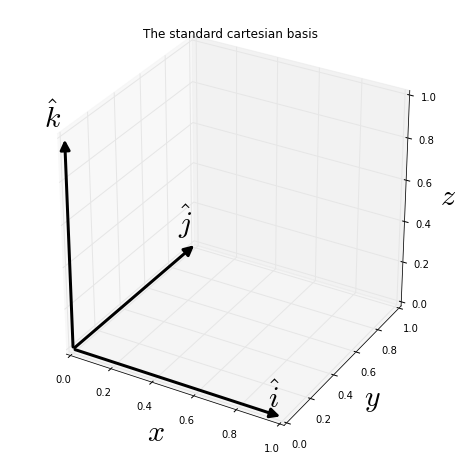

In [1]:
# challenge ...
# plot the 3 axis vectors with appropriate labels using matplotlib!
#from matplotlib import rc

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pylab
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

# no luck with latex rendering this time ...
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# posted this fancy arrow object
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a) 

ax.set_xlabel(r'$ x$',fontsize=30, rotation=0)
ax.xaxis.set_rotate_label(False) 
ax.set_ylabel(r'$ y$',fontsize=30, rotation=0)
ax.yaxis.set_rotate_label(False) 
ax.set_zlabel(r'$ z$', fontsize=30, rotation=0)
ax.zaxis.set_rotate_label(False) 

#x2, y2, _ = proj3d.proj_transform(0,0,1, ax.get_proj())
#label = pylab.annotate(
#    r'$ \hat{k}$', 
#    xy = (x2, y2), xytext = (-20, 20),
#    textcoords = 'offset points', ha = 'right', va = 'bottom',
#    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 

plt.title('The standard cartesian basis')

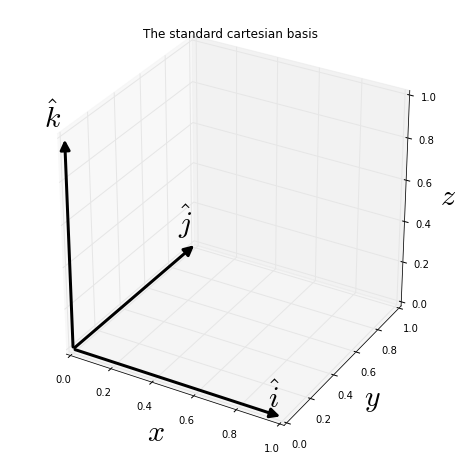

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

from sympy import *
from sympy.vector import *
from __future__ import division

e = CoordSysCartesian('e')

x,y,z = symbols('x,y,z')

r = x*e.i + y*e.j + z*e.k

i_vec = r.subs({x:1.0,y:0.0,z:0.0})
j_vec = r.subs({x:0.0,y:1.0,z:0.0})
k_vec = r.subs({x:0.0,y:0.0,z:1.0})
origin_vec = r.subs({x:0.0,y:0.0,z:0.0})






X = [0,1]
Y = [0,0]
Z = [0,0]
a = Arrow3D(X, Y, Z, mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)

X = [0,0]
Y = [0,1]
Z = [0,0]
a = Arrow3D(X, Y, Z, mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a) 

X = [0,0]
Y = [0,0]
Z = [0,1]
a = Arrow3D(X, Y, Z, mutation_scale=20, lw=3, arrowstyle="-|>", color="k")
ax.add_artist(a)



ax.set_xlabel(r'$ x$',fontsize=30, rotation=0)
ax.xaxis.set_rotate_label(False) 
ax.set_ylabel(r'$ y$',fontsize=30, rotation=0)
ax.yaxis.set_rotate_label(False) 
ax.set_zlabel(r'$ z$', fontsize=30, rotation=0)
ax.zaxis.set_rotate_label(False) 

#x2, y2, _ = proj3d.proj_transform(0,0,1, ax.get_proj())
#label = pylab.annotate(
#    r'$ \hat{k}$', 
#    xy = (x2, y2), xytext = (-20, 20),
#    textcoords = 'offset points', ha = 'right', va = 'bottom',
#    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 

plt.title('The standard cartesian basis')

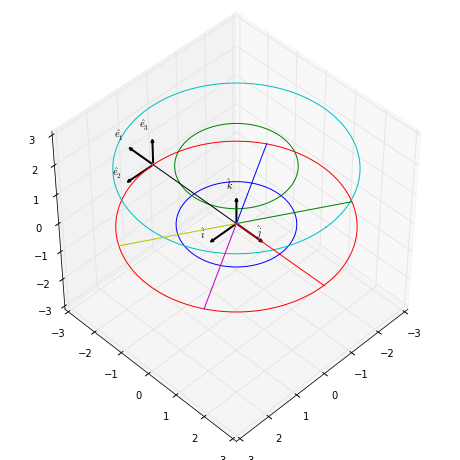

In [3]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

#x2, y2, _ = proj3d.proj_transform(0,0,1, ax.get_proj())
#label = pylab.annotate(
#    r'$ \hat{k}$', 
#    xy = (x2, y2), xytext = (-20, 20),
#    textcoords = 'offset points', ha = 'right', va = 'bottom',
#    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

def PlotBasisCartesian():
    a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a) 
    annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=10, xytext=(-3,4),
                   textcoords='offset points', ha='right',va='bottom') 
    
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
theta = np.linspace(0, 2* np.pi, 100)

# plot some coordinate curves for varying values of z, rho
z = 0
rho = 1.5
x = rho * np.sin(theta)
y = rho * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
#z=1
#ax.plot(x, y, z, label='parametric curve')
z=2
ax.plot(x, y, z, label='parametric curve')
z =0
rho = 3
x = rho * np.sin(theta)
y = rho * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
#z=1
#ax.plot(x, y, z, label='parametric curve')
z=2
ax.plot(x, y, z, label='parametric curve')
rho = np.linspace(0,3,20)

# plot some circles
rho = np.linspace(0,3,10)
for j in range(0,6):
    theta_ = 2*np.pi * (j+1) / 6
    z=0
    x = rho * np.sin(theta_)
    y = rho * np.cos(theta_)
    ax.plot(x, y, z, label='parametric curve')
    
    
# plot the i,j,k reference frame
PlotBasisCartesian()


from sympy import pi
from sympy.vector import *
#from math import sin, cos
from sympy import sin,cos # the sympy version
e = CoordSysCartesian('e')

# where is pi? I had to use this
PI = 3.14159

# set up some symbols, that don't clash with the numpy variables above
phi,rho1,zz  = symbols('phi,rho1,zz')

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*cos(phi)*e.i + rho1*sin(phi)*e.j + zz*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,phi)
dr_z = diff(r,zz)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_z / dr_z.magnitude()

# add some numbers, keeping the frame for reuse
P1 = r.subs({rho1:3,phi:-PI/2,zz:0})
E1_1 = E1.subs({rho1:3,phi:-PI/2,zz:0})
E2_1 = E2.subs({rho1:3,phi:-PI/2,zz:0})
E3_1 = E3.subs({rho1:3,phi:-PI/2,zz:0})


# Set up the arrow for the E1 vector (uses lists)

LX=[float(N(P1.dot(e.i))), float(N(E1_1.dot(e.i)+P1.dot(e.i)))]

LY=[float(N(P1.dot(e.j))), float(N(E1_1.dot(e.j)+P1.dot(e.j)))]

LZ=[float(N(P1.dot(e.k))), float(N(E1_1.dot(e.k)+P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a)

xyz_ = (LX[1], LY[1], LZ[1])

annotate3D(ax, r'$ \hat{e_1}$', xyz=xyz_, fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 


# Set up the arrow for the E2 vector

LX=[float(N(P1.dot(e.i))), float(N(E2_1.dot(e.i)+P1.dot(e.i)))]

LY=[float(N(P1.dot(e.j))), float(N(E2_1.dot(e.j)+P1.dot(e.j)))]

LZ=[float(N(P1.dot(e.k))), float(N(E2_1.dot(e.k)+P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a)

xyz_ = (LX[1], LY[1], LZ[1])

annotate3D(ax, r'$ \hat{e_2}$', xyz=xyz_, fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 


# Set up the arrow for the E3 vector

LX=[float(N(P1.dot(e.i))), float(N(E3_1.dot(e.i)+P1.dot(e.i)))]

LY=[float(N(P1.dot(e.j))), float(N(E3_1.dot(e.j)+P1.dot(e.j)))]

LZ=[float(N(P1.dot(e.k))), float(N(E3_1.dot(e.k)+P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
ax.add_artist(a)

xyz_ = (LX[1], LY[1], LZ[1])

annotate3D(ax, r'$ \hat{e_3}$', xyz=xyz_, fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 


ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

ax.view_init(45, 45)

In [ ]:
float(E2_1.dot(e.i))

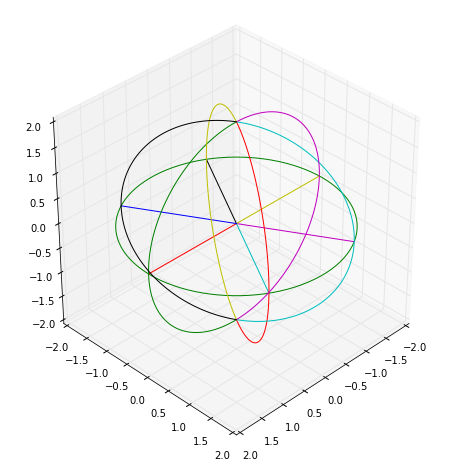

In [4]:
#fig = plt.figure()
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
theta = np.linspace(0, 2* np.pi, 100)

    
phi = np.linspace(0, np.pi, 100)


r = 2
#ax = fig.add_subplot(1, 1, 1, projection='3d')
for j in range(0,2):
    phi_ = np.pi*j / 2
    z = r * np.cos(phi_)

    x = r * np.sin(phi_)* np.cos(theta)
    y = r * np.sin(phi_)* np.sin(theta)
    ax.plot(x, y, z, label='parametric curve')
    
#ax = fig.add_subplot(2, 2, 2, projection='3d')
r = np.linspace(0,2,40)
for j in range(0,6):
    phi_ = np.pi / 2
    theta_ = 2*np.pi *j/6
    z = r * np.cos(phi_)


    x = r * np.sin(phi_)* np.cos(theta_)
    y = r * np.sin(phi_)* np.sin(theta_)
    
    ax.plot(x, y, z, label='parametric curve')
    ax.set_zlim(-1,1)

#ax = fig.add_subplot(2, 2, 3, projection='3d')
r = 2
for j in range(0,6):
    
    theta_ = 2*np.pi *j/6
    z = r * np.cos(phi)


    x = r * np.sin(phi)* np.cos(theta_)
    y = r * np.sin(phi)* np.sin(theta_)
    
    ax.plot(x, y, z, label='parametric curve')
   
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

ax.view_init(35, 45)

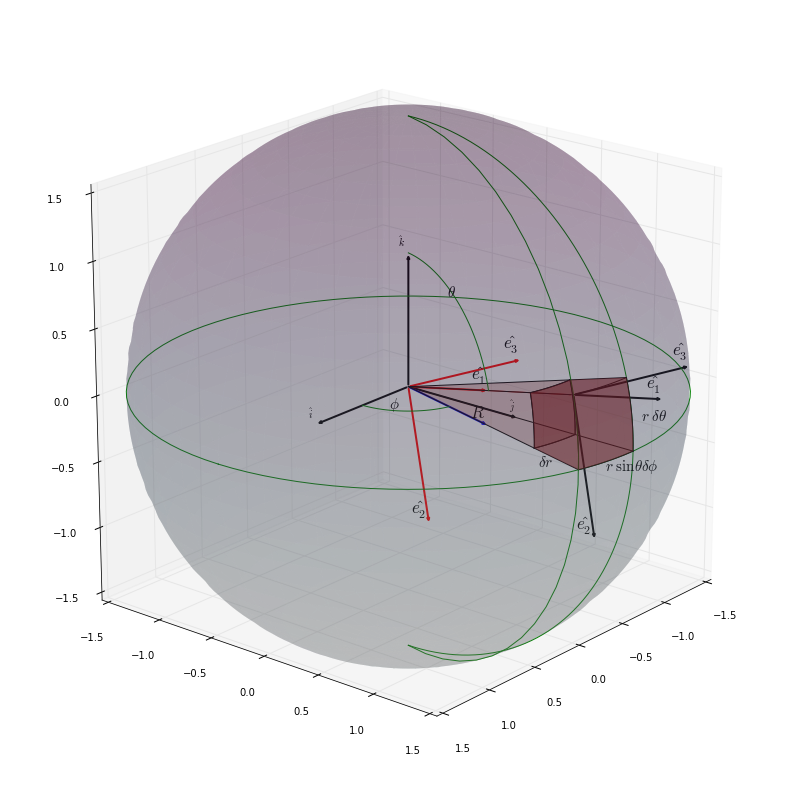

In [5]:
from matplotlib.colors import LightSource
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 2 * np.outer(np.cos(u), np.sin(v))
y = 2 * np.outer(np.sin(u), np.sin(v))
z = 2 * np.outer(np.ones(np.size(u)), np.cos(v))

ls = LightSource(azdeg=100, altdeg=45)
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0,cmap=plt.get_cmap('BuPu'))
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0)

# draw x,y plane circle at z=0
cx = 2*np.cos(u)
cy = 2*np.sin(u)
cz = 0
ax.plot(cx, cy, cz, color='g')

# draw arc from phi=0 to phi=pi
cx = 2*np.cos(np.pi/2)*np.sin(v)
cy = 2*np.sin(np.pi/2)*np.sin(v)
cz = 2*np.cos(v)
ax.plot(cx, cy, cz, color='g')




def Plot_Arc_Sphere_fixed_theta(ax, radius, fixed_theta, min_phi, max_phi,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    #u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cos(fixed_theta)*np.sin(v)
    cy = radius*np.sin(fixed_theta)*np.sin(v)
    cz = radius*np.cos(v)
    ax.plot(cx, cy, cz, color=s_color, alpha = s_alpha)
    
    
def Plot_Arc_Sphere_fixed_phi(ax, radius, fixed_phi, min_theta, max_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    u = np.linspace(min_theta, max_theta, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.sin(fixed_phi)*np.cos(u)
    cy = radius*np.sin(fixed_phi)*np.sin(u)
    cz = radius*np.cos(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)
    
def Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius, max_radius, fixed_phi, fixed_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    radius = np.linspace(min_radius, max_radius, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.sin(fixed_phi)*np.cos(fixed_theta)
    cy = radius*np.sin(fixed_phi)*np.sin(fixed_theta)
    cz = radius*np.cos(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)    

def Plot_Surface_Patch_Sphere(ax, radius, u_range, v_range, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = radius * np.outer(np.cos(u_range), np.sin(v_range))
    y = radius * np.outer(np.sin(u_range), np.sin(v_range))
    z = radius * np.outer(np.ones(np.size(u_range)), np.cos(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Theta(ax, rad_range, theta, v_range,s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.cos(theta) * np.outer(rad_range, np.sin(v_range))
    y = np.sin(theta) * np.outer(rad_range, np.sin(v_range))
    z = np.outer(rad_range,  np.cos(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Phi(ax, rad_range, u_range, phi, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.sin(phi) * np.outer(rad_range, np.cos(u_range))
    y = np.sin(phi) * np.outer(rad_range, np.sin(u_range))
    z = np.outer(rad_range,  np.cos(phi))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)

def Plot_Volume_Element_Sphere(ax, min_radius, max_radius, min_theta, max_theta, 
                               min_phi, max_phi, steps, 
                               s_color, f_alpha, surface_line_width, 
                               steps_boundary, s_color_boundary, f_alpha_boundary, 
                               stride_r=10, stride_c=10):
    
    u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    vol_r = np.linspace(min_radius,max_radius,steps)

    Plot_Surface_Patch_Sphere(ax, max_radius, u, v, s_color, f_alpha, surface_line_width)
    Plot_Surface_Patch_Sphere(ax, min_radius, u, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, max_theta, v, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, min_theta, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, max_phi, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, min_phi, s_color, f_alpha, surface_line_width)
    
    # lines bounding the front patch
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, max_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, max_radius, max_phi,  min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_theta(ax, min_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, min_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, min_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, min_radius, max_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)


# this is a mess that should be fixed for all angles   
def Annotate_Volume_Element(ax, min_radius, max_radius, min_theta, max_theta, min_phi, max_phi ) :   
    xyz_ = (max_radius* np.cos(min_theta + np.pi/24)*np.sin(max_phi), 
            max_radius* np.sin(min_theta + np.pi/24)*np.sin(max_phi), 
            max_radius* np.cos(max_phi))

    annotate3D(ax, r'$ r\ \sin \theta \delta \phi$', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
    
    xyz_ = (max_radius* np.cos(max_theta+np.pi/48)*np.sin(min_phi+ np.pi/16), 
            max_radius* np.sin(max_theta+np.pi/48)*np.sin(min_phi+ np.pi/16), 
            max_radius* np.cos(min_phi+ np.pi/16))

    annotate3D(ax, r'$ r\ \delta \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom') 
    
    
    xyz_ = ((min_radius + (max_radius-min_radius)/2)* np.cos(max_theta- np.pi/12)*np.sin(max_phi), 
            (min_radius + (max_radius-min_radius)/2) *np.sin(max_theta- np.pi/12)*np.sin(max_phi), 
            (min_radius + (max_radius-min_radius)/2) * np.cos(max_phi))

    annotate3D(ax, r'$  \delta r $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='right',va='top') 

    

Plot_Volume_Element_Sphere(ax, 1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/2-np.pi/12, np.pi/2, 10, 'r', 0.35, 0, 
                           100,'k',1)
Plot_Volume_Element_Sphere(ax, 0, 1.5, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/2-np.pi/12, np.pi/2, 10, 'r', 0.125,0, 
                           100,'k',1 )

Annotate_Volume_Element(ax,  1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/2-np.pi/12, np.pi/2 )
#ax.plot_surface(x, y, 0, rstride =10,
#    cstride = 10, color ='r',alpha=0.125)

PlotBasisCartesian()

# set up some symbols, that don't clash with the numpy variables above
phi,theta1, rho1,zz  = symbols('phi,theta1, rho1,zz')

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*cos(theta1)*sin(phi)*e.i + rho1*sin(theta1)*sin(phi)*e.j + rho1*cos(phi)*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,theta1)
dr_phi = diff(r,phi)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_phi / dr_phi.magnitude()

theta_angle = PI/2-PI/12
phi_angle = PI/2-PI/12
radius = 2
# add some numbers, keeping the frame for reuse
P1 =   r.subs( {rho1:radius, theta1:theta_angle, phi:phi_angle })
E1_1 = E1.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E2_1 = E3.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E3_1 = E2.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })


# requires sympy vector
# requires CoordSysCartesian e
# requires Arrow3D
# requires Annotate3D
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)
    
    
 
#r'$ \hat{e_1}$'
# Set up the arrow for the E1 vector (uses lists)

#LX=[float(N(P1.dot(e.i))), float(N(E1_1.dot(e.i)+P1.dot(e.i)))]

plot_basis(P1, E1_1, E2_1, E3_1, e, "k")

zero_vec = 0*e.i+0*e.j+0*e.k

plot_basis(zero_vec, E1_1, E2_1, E3_1, e, "r")



Plot_Arc_Sphere_fixed_theta(ax, 1, theta_angle, 0, phi_angle ,30, 'g', 1)
Plot_Arc_Sphere_fixed_theta(ax, 2, theta_angle, 0, PI ,30, 'g', 1)

xyz_ = (cos(theta_angle)*sin(phi_angle/2),sin(theta_angle)*sin(phi_angle/2) , cos(phi_angle/2))
annotate3D(ax, r'$ \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='bottom') 

xyz_ = (cos(theta_angle/2)*sin(phi_angle),sin(theta_angle/2)*sin(phi_angle) , cos(phi_angle))
annotate3D(ax, r'$ \phi $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='top') 

Plot_Arc_Sphere_fixed_phi(ax, 0.5, PI/2,  0 ,theta_angle,30, 'g', 1) 

xy_projection_e1 = E1_1.dot(e.i) * e.i +E1_1.dot(e.j) * e.j + 0*e.k 
e1_dot_k = E1_1.dot(e.k) * e.k  

plot_arrow(zero_vec,xy_projection_e1,e,r'$ R$','b')   

#plot_arrow(xy_projection_e1,e1_dot_k,e,r'','b')   

LX=[0, float(N(P1.dot(e.i)))]
LY=[0, float(N(P1.dot(e.j)))]
LZ=[0, float(N(P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=1, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(a)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

ax.view_init(20, 40) # ??? ok almost sufficient
#plt.plot(CatVec[:,0],CatVec[:,1],CatVec[:,2],'ro')

In [ ]:
# stack overflow example demonstrating how to plot transparency 
# for polygons, with dashed lines for backfacing polygons
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0, 2, 1, 1]
y = [0, 0, 1, 0]
z = [0, 0, 0, 1]

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]

tupleList = zip(x, y, z)

poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=1, alpha=0.5))
ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=0.2, linestyles=':'))

plt.show()

In [ ]:
# An answer to 
# https://stackoverflow.com/questions/39822480/plotting-a-solid-cylinder-centered-on-a-plane-in-matplotlib

import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import norm

#axis and radius
p0 = np.array([0, 0, 0]) #point at one end
p1 = np.array([0, 0, 8]) #point at other end
R = 5

#vector in direction of axis
v = p1 - p0

#find magnitude of vector
mag = norm(v)

#unit vector in direction of axis
v = v / mag

#make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0])

#make vector perpendicular to v
n1 = np.cross(v, not_v)
#normalize n1
n1 /= norm(n1)

#make unit vector perpendicular to v and n1
n2 = np.cross(v, n1)

#surface ranges over t from 0 to length of axis and 0 to 2*pi
t = np.linspace(0, mag, 2)
theta = np.linspace(0, 2 * np.pi, 100)
rsample = np.linspace(0, R, 2)

#use meshgrid to make 2d arrays
t, theta2 = np.meshgrid(t, theta)

rsample,theta = np.meshgrid(rsample, theta)

#generate coordinates for surface
# "Tube"
X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta2) * n1[i] + R * np.cos(theta2) *       n2[i] for i in [0, 1, 2]]
# "Bottom"
X2, Y2, Z2 = [p0[i] + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]
# "Top"
X3, Y3, Z3 = [p0[i] + v[i]*mag + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]


ax=plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='blue')
ax.plot_surface(X2, Y2, Z2, color='blue')
ax.plot_surface(X3, Y3, Z3, color='blue')

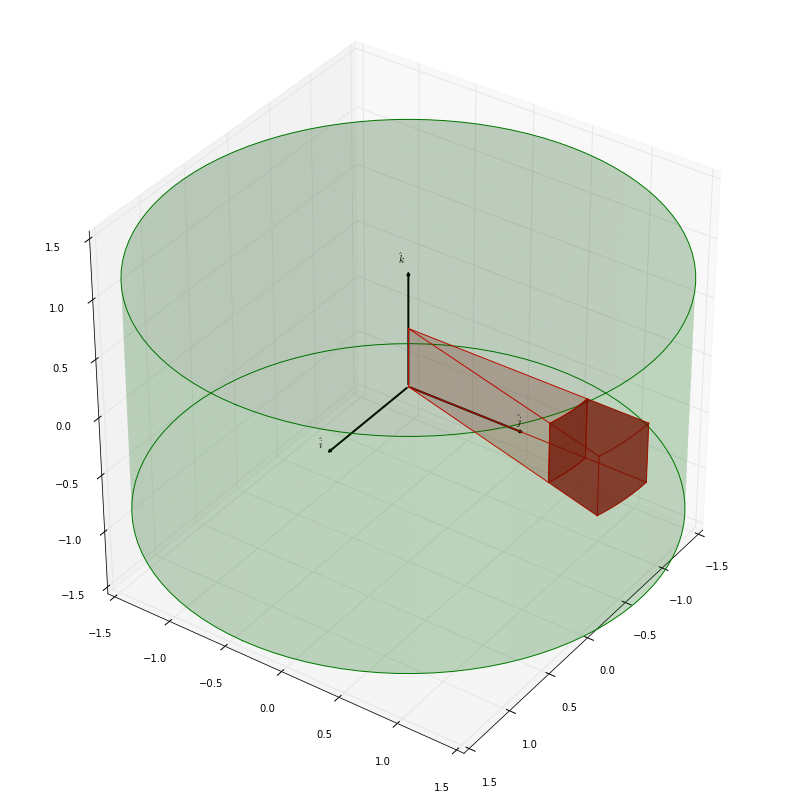

In [85]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

R = 2

theta = np.linspace(0, 2 * np.pi, 100)
Z = np.linspace(-1, 1, 100)

def Plot_Circle(ax, Rad, t_theta, z_val, s_color):
    x = Rad * np.cos(t_theta)
    y = Rad * np.sin(t_theta)
    z = z_val
    ax.plot(x, y, z, color =s_color)
    
def Plot_Cyclinder_Arc_Fixed_Radius_Fixed_Z(ax, t_radius,min_theta, max_theta, t_z, s_color,f_alpha ):
    L_theta = np.linspace(min_theta, max_theta, 10)
    x = t_radius * np.cos(L_theta)
    y = t_radius * np.sin(L_theta)
    z = t_z
    ax.plot(x, y, z, color =s_color)
    
def Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Z(ax, min_radius, max_radius, t_theta, t_z, s_color,f_alpha ):
    L_R  = np.linspace(min_radius, max_radius, 10)
    x = L_R * np.cos(t_theta)
    y = L_R * np.sin(t_theta)
    z = t_z
    ax.plot(x, y, z, color =s_color)    
    
def Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Radius(ax, t_radius, t_theta, min_z, max_z, s_color,f_alpha ):
    #L_Z2  = np.linspace(min_z, max_z, 10)
    x = t_radius * np.cos(t_theta)
    y = t_radius * np.sin(t_theta)
    #z = L_Z
    #z = radius * np.outer(np.ones(np.size(u_range)), np.cos(v_range))
    ax.plot([x,x], [y,y], [min_z,max_z], color =s_color)      
    #ax.plot(VecStart_x + VecEnd_x, VecStart_y + VecEnd_y, VecStart_z +VecEnd_z)

def Plot_Cylindrical_Patch(ax, t_radius, min_theta, max_theta, min_z, max_z, s_color,f_alpha, stride_r=10, stride_c=10):
    L_theta = np.linspace(min_theta, max_theta, 10)
    L_Z = np.linspace(min_z, max_z, 10)
    L_t, L_theta2 = np.meshgrid(L_Z, L_theta)
    
    x = t_radius * np.cos(L_theta2)
    y = t_radius * np.sin(L_theta2)
    z = L_t
    
    ax.plot_surface(x, y, z, rstride =stride_r,
    cstride = stride_c, color =s_color,alpha=f_alpha, linewidth=0)    
    
def Plot_Cylindrical_Radial_Patch_Fixed_Theta(ax, min_radius, max_radius, t_theta, min_z, max_z,s_color,f_alpha, stride_r=10, stride_c=10):

    L_R  = np.linspace(min_radius, max_radius, 10)
    L_Z = np.linspace(min_z, max_z, 10)
    L_t, L_R = np.meshgrid(L_Z, L_R)
    
    x = L_R * np.cos(t_theta)
    y = L_R * np.sin(t_theta)
    z = L_t
    
    ax.plot_surface(x, y, z, rstride =stride_r,
    cstride = stride_c, color =s_color,alpha=f_alpha, linewidth=0)    
    
def Plot_Cylindrical_Radial_Patch_Fixed_Z(ax, min_radius, max_radius, min_theta, max_theta, t_z,s_color,f_alpha, stride_r=10, stride_c=10):
    L_theta = np.linspace(min_theta, max_theta, 10)
    L_R  = np.linspace(min_radius, max_radius, 10)
    
    L_theta, L_R = np.meshgrid(L_theta, L_R)
    
    x = L_R * np.cos(L_theta)
    y = L_R * np.sin(L_theta)
    z = t_z
    
    ax.plot_surface(x, y, z, rstride =stride_r,
    cstride = stride_c, color =s_color,alpha=f_alpha, linewidth=0)      
    
def Plot_Cylindrical_Volume_Element(ax, min_radius, max_radius, min_theta, max_theta, min_z, max_z, s_color, f_alpha,stride_r=10, stride_c=10):
    Plot_Cylindrical_Patch(ax, max_radius, min_theta, max_theta, min_z, max_z,s_color, f_alpha)
    Plot_Cylindrical_Patch(ax, min_radius, min_theta, max_theta, min_z, max_z,s_color,f_alpha)
    
    Plot_Cylindrical_Radial_Patch_Fixed_Theta(ax, min_radius, max_radius, min_theta, min_z, max_z,s_color,f_alpha)
    Plot_Cylindrical_Radial_Patch_Fixed_Theta(ax, min_radius, max_radius, max_theta, min_z, max_z,s_color,f_alpha)
    
    Plot_Cylindrical_Radial_Patch_Fixed_Z(ax, min_radius, max_radius, min_theta, max_theta, min_z,s_color,f_alpha)
    Plot_Cylindrical_Radial_Patch_Fixed_Z(ax, min_radius, max_radius, min_theta, max_theta, max_z,s_color,f_alpha)
    
    Plot_Cyclinder_Arc_Fixed_Radius_Fixed_Z(ax, min_radius, min_theta, max_theta, min_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Radius_Fixed_Z(ax, max_radius, min_theta, max_theta, min_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Radius_Fixed_Z(ax, min_radius, min_theta, max_theta, max_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Radius_Fixed_Z(ax, max_radius, min_theta, max_theta, max_z, s_color,f_alpha )
    
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Z(ax, min_radius, max_radius, min_theta, min_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Z(ax, min_radius, max_radius, min_theta, max_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Z(ax, min_radius, max_radius, max_theta, min_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Z(ax, min_radius, max_radius, max_theta, max_z, s_color,f_alpha )
    
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Radius(ax, min_radius, min_theta, min_z, max_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Radius(ax, max_radius, min_theta, min_z, max_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Radius(ax, min_radius, max_theta, min_z, max_z, s_color,f_alpha )
    Plot_Cyclinder_Arc_Fixed_Theta_Fixed_Radius(ax, max_radius, max_theta, min_z, max_z, s_color,f_alpha )    


# Plot green boundary circles at the top and bottom
Plot_Circle(ax, R, theta, 1, 'g')
Plot_Circle(ax, R, theta, -1, 'g')

# need to create a mesh grid to draw the surface
# learned from example above
t, theta2 = np.meshgrid(Z, theta)

x = R * np.cos(theta2)
y = R * np.sin(theta2)
z = t

# plot the tube
ax.plot_surface(x, y, z, rstride =5,
    cstride = 5, color ='g',alpha=0.125, linewidth=0)

# now another meshgrid for the caps
R_s = np.linspace(0,R,2)
R_s,theta = np.meshgrid(R_s, theta)


x = R_s * np.cos(theta)
y = R_s * np.sin(theta)

# plot the caps
ax.plot_surface(x, y, -1, rstride =5,
    cstride = 5, color ='g',alpha=0.125, linewidth=0)

ax.plot_surface(x, y, 1, rstride =5,
    cstride = 5, color ='g',alpha=0.125, linewidth=0)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

Plot_Cylindrical_Volume_Element(ax, 1.5,2, np.pi/2-np.pi/12, np.pi/2, 0,0.5, 'r',0.5)
Plot_Cylindrical_Volume_Element(ax, 0, 1.5, np.pi/2-np.pi/12, np.pi/2, 0,0.5, 'r',0.125)

# plot the i,j,k
PlotBasisCartesian()

ax.view_init(35, 35)

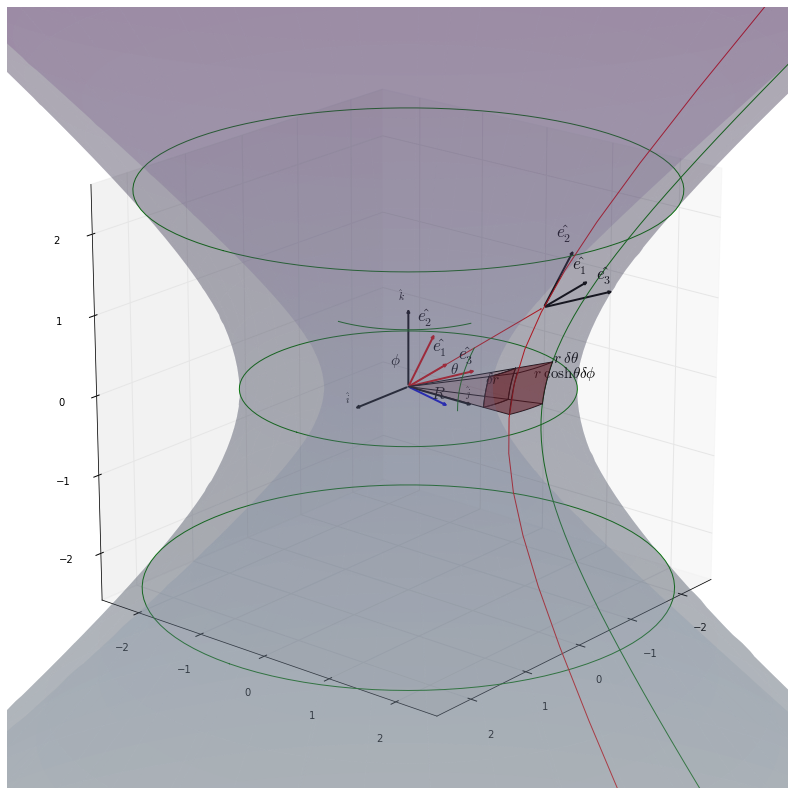

In [26]:
from matplotlib.colors import LightSource
from sympy import sinh,cosh
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(-np.pi, np.pi, 100)
x = 2 * np.outer(np.cos(u), np.cosh(v))
y = 2 * np.outer(np.sin(u), np.cosh(v))
z = 2 * np.outer(np.ones(np.size(u)), np.sinh(v))



ls = LightSource(azdeg=100, altdeg=45)
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0,cmap=plt.get_cmap('BuPu'))
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0)

x = 1 * np.outer(np.cos(u), np.cosh(v))
y = 1 * np.outer(np.sin(u), np.cosh(v))
z = 1 * np.outer(np.ones(np.size(u)), np.sinh(v))

ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0,cmap=plt.get_cmap('BuPu'))

# draw x,y plane circle at z=0
cx = 2*np.cos(u)
cy = 2*np.sin(u)
cz = 0
ax.plot(cx, cy, cz, color='g')

# draw circle at phi=-pi/3
cx = 2*np.cos(u)*np.cosh(-np.pi/3)
cy = 2*np.sin(u)*np.cosh(-np.pi/3)
cz = 2*np.sinh(-np.pi/3)
ax.plot(cx, cy, cz, color='g')

# draw circle at phi=pi/3
cx = 2*np.cos(u)*np.cosh(np.pi/3)
cy = 2*np.sin(u)*np.cosh(np.pi/3)
cz = 2*np.sinh(np.pi/3)
ax.plot(cx, cy, cz, color='g')

# draw arc from phi=0 to phi=pi
cx = 2*np.cos(np.pi/2)*np.cosh(v)
cy = 2*np.sin(np.pi/2)*np.cosh(v)
cz = 2*np.sinh(v)
ax.plot(cx, cy, cz, color='g')




def Plot_Arc_Sphere_fixed_theta(ax, radius, fixed_theta, min_phi, max_phi,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    #u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cos(fixed_theta)*np.cosh(v)
    cy = radius*np.sin(fixed_theta)*np.cosh(v)
    cz = radius*np.sinh(v)
    ax.plot(cx, cy, cz, color=s_color, alpha = s_alpha)
    
    
def Plot_Arc_Sphere_fixed_phi(ax, radius, fixed_phi, min_theta, max_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    u = np.linspace(min_theta, max_theta, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cosh(fixed_phi)*np.cos(u)
    cy = radius*np.cosh(fixed_phi)*np.sin(u)
    cz = radius*np.sinh(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)
    
def Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius, max_radius, fixed_phi, fixed_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    radius = np.linspace(min_radius, max_radius, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cosh(fixed_phi)*np.cos(fixed_theta)
    cy = radius*np.cosh(fixed_phi)*np.sin(fixed_theta)
    cz = radius*np.sinh(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)    

def Plot_Surface_Patch_Sphere(ax, radius, u_range, v_range, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = radius * np.outer(np.cos(u_range), np.cosh(v_range))
    y = radius * np.outer(np.sin(u_range), np.cosh(v_range))
    z = radius * np.outer(np.ones(np.size(u_range)), np.sinh(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Theta(ax, rad_range, theta, v_range,s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.cos(theta) * np.outer(rad_range, np.cosh(v_range))
    y = np.sin(theta) * np.outer(rad_range, np.cosh(v_range))
    z = np.outer(rad_range,  np.sinh(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Phi(ax, rad_range, u_range, phi, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.cosh(phi) * np.outer(rad_range, np.cos(u_range))
    y = np.cosh(phi) * np.outer(rad_range, np.sin(u_range))
    z = np.outer(rad_range,  np.sinh(phi))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)

def Plot_Volume_Element_Sphere(ax, min_radius, max_radius, min_theta, max_theta, 
                               min_phi, max_phi, steps, 
                               s_color, f_alpha, surface_line_width, 
                               steps_boundary, s_color_boundary, f_alpha_boundary, 
                               stride_r=10, stride_c=10):
    
    u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    vol_r = np.linspace(min_radius,max_radius,steps)

    Plot_Surface_Patch_Sphere(ax, max_radius, u, v, s_color, f_alpha, surface_line_width)
    Plot_Surface_Patch_Sphere(ax, min_radius, u, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, max_theta, v, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, min_theta, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, max_phi, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, min_phi, s_color, f_alpha, surface_line_width)
    
    # lines bounding the front patch
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, max_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, max_radius, max_phi,  min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_theta(ax, min_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, min_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, min_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, min_radius, max_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)


# this is a mess that should be fixed for all angles   
def Annotate_Volume_Element(ax, min_radius, max_radius, min_theta, max_theta, min_phi, max_phi ) :   
    xyz_ = (max_radius* np.cos(min_theta + np.pi/24)*np.cosh(max_phi), 
            max_radius* np.sin(min_theta + np.pi/24)*np.cosh(max_phi), 
            max_radius* np.sinh(max_phi))

    annotate3D(ax, r'$ r\ \cosh \theta \delta \phi$', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
    
    xyz_ = (max_radius* np.cos(max_theta+np.pi/48)*np.cosh(min_phi+ np.pi/16), 
            max_radius* np.sin(max_theta+np.pi/48)*np.cosh(min_phi+ np.pi/16), 
            max_radius* np.sinh(min_phi+ np.pi/16))

    annotate3D(ax, r'$ r\ \delta \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom') 
    
    
    xyz_ = ((min_radius + (max_radius-min_radius)/2)* np.cos(max_theta- np.pi/12)*np.cosh(max_phi), 
            (min_radius + (max_radius-min_radius)/2) *np.sin(max_theta- np.pi/12)*np.cosh(max_phi), 
            (min_radius + (max_radius-min_radius)/2) * np.sinh(max_phi))

    annotate3D(ax, r'$  \delta r $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='right',va='top') 

    

Plot_Volume_Element_Sphere(ax, 1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8, 10, 'r', 0.35, 0, 
                           100,'k',1)
Plot_Volume_Element_Sphere(ax, 0, 1.5, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8, 10, 'r', 0.125,0, 
                           100,'k',1 )

Annotate_Volume_Element(ax,  1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8 )
#ax.plot_surface(x, y, 0, rstride =10,
#    cstride = 10, color ='r',alpha=0.125)

PlotBasisCartesian()

# set up some symbols, that don't clash with the numpy variables above
phi,theta1, rho1,zz  = symbols('phi,theta1, rho1,zz')

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*cos(theta1)*cosh(phi)*e.i + rho1*sin(theta1)*cosh(phi)*e.j + rho1*sinh(phi)*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,theta1)
dr_phi = diff(r,phi)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_phi / dr_phi.magnitude()

theta_angle = PI/2-PI/12
phi_angle = PI/3-PI/12
radius = 2
# add some numbers, keeping the frame for reuse
P1 =   r.subs( {rho1:radius, theta1:theta_angle, phi:phi_angle })
E1_1 = E1.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E2_1 = E3.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E3_1 = E2.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })


# requires sympy vector
# requires CoordSysCartesian e
# requires Arrow3D
# requires Annotate3D
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)
    
    
 
#r'$ \hat{e_1}$'
# Set up the arrow for the E1 vector (uses lists)

#LX=[float(N(P1.dot(e.i))), float(N(E1_1.dot(e.i)+P1.dot(e.i)))]

plot_basis(P1, E1_1, E2_1, E3_1, e, "k")

zero_vec = 0*e.i+0*e.j+0*e.k

plot_basis(zero_vec, E1_1, E2_1, E3_1, e, "r")



Plot_Arc_Sphere_fixed_theta(ax, 1, theta_angle, 0, phi_angle ,30, 'g', 1)
Plot_Arc_Sphere_fixed_theta(ax, 2, theta_angle, -PI, PI ,30, 'r', 1)

xyz_ = (cos(theta_angle)*cosh(phi_angle/2),sin(theta_angle)*cosh(phi_angle/2) , sinh(phi_angle/2))
annotate3D(ax, r'$ \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='bottom') 

xyz_ = (cos(theta_angle/2)*cosh(phi_angle),sin(theta_angle/2)*cosh(phi_angle) , sinh(phi_angle))
annotate3D(ax, r'$ \phi $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='top') 

Plot_Arc_Sphere_fixed_phi(ax, 0.5, PI/2,  0 ,theta_angle,30, 'g', 1) 

xy_projection_e1 = E1_1.dot(e.i) * e.i +E1_1.dot(e.j) * e.j + 0*e.k 
e1_dot_k = E1_1.dot(e.k) * e.k  

plot_arrow(zero_vec,xy_projection_e1,e,r'$ R$','b')   

#plot_arrow(xy_projection_e1,e1_dot_k,e,r'','b')   

LX=[0, float(N(P1.dot(e.i)))]
LY=[0, float(N(P1.dot(e.j)))]
LZ=[0, float(N(P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=1, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(a)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

ax.view_init(20, 40) # ??? ok almost sufficient
#plt.plot(CatVec[:,0],CatVec[:,1],CatVec[:,2],'ro')


### Not Sure what to make of this hyperboloid of 1 sheet with a volume element?
### the basis vectors are not orthogonal (in the Euclidean sense) and
### the e_1 vector does not represent a normal vector.

In [ ]:
from matplotlib.colors import LightSource
from sympy import sinh,cosh
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(-np.pi, np.pi, 100)
x = 2 * np.outer(np.cos(u), np.cosh(v))
y = 2 * np.outer(np.sin(u), np.cosh(v))
z = 2 * np.outer(np.ones(np.size(u)), np.sinh(v))

ls = LightSource(azdeg=100, altdeg=45)
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0,cmap=plt.get_cmap('BuPu'))
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0)

# draw x,y plane circle at z=0
cx = 2*np.cos(u)
cy = 2*np.sin(u)
cz = 0
ax.plot(cx, cy, cz, color='g')

# draw circle at phi=-pi/3
cx = 2*np.cos(u)*np.cosh(-np.pi/3)
cy = 2*np.sin(u)*np.cosh(-np.pi/3)
cz = 2*np.sinh(-np.pi/3)
ax.plot(cx, cy, cz, color='g')

# draw circle at phi=pi/3
cx = 2*np.cos(u)*np.cosh(np.pi/3)
cy = 2*np.sin(u)*np.cosh(np.pi/3)
cz = 2*np.sinh(np.pi/3)
ax.plot(cx, cy, cz, color='g')

# draw arc from phi=0 to phi=pi
cx = 2*np.cos(np.pi/2)*np.cosh(v)
cy = 2*np.sin(np.pi/2)*np.cosh(v)
cz = 2*np.sinh(v)
ax.plot(cx, cy, cz, color='g')




def Plot_Arc_Sphere_fixed_theta(ax, radius, fixed_theta, min_phi, max_phi,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    #u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cos(fixed_theta)*np.cosh(v)
    cy = radius*np.sin(fixed_theta)*np.cosh(v)
    cz = radius*np.sinh(v)
    ax.plot(cx, cy, cz, color=s_color, alpha = s_alpha)
    
    
def Plot_Arc_Sphere_fixed_phi(ax, radius, fixed_phi, min_theta, max_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    u = np.linspace(min_theta, max_theta, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cosh(fixed_phi)*np.cos(u)
    cy = radius*np.cosh(fixed_phi)*np.sin(u)
    cz = radius*np.sinh(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)
    
def Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius, max_radius, fixed_phi, fixed_theta,steps, s_color, s_alpha):
    # draw arc from phi=0 to phi=pi
    radius = np.linspace(min_radius, max_radius, steps)
    #v = np.linspace(min_phi, max_phi, steps)
    
    cx = radius*np.cosh(fixed_phi)*np.cos(fixed_theta)
    cy = radius*np.cosh(fixed_phi)*np.sin(fixed_theta)
    cz = radius*np.sinh(fixed_phi)
    ax.plot(cx, cy, cz, color=s_color,alpha = s_alpha)    

def Plot_Surface_Patch_Sphere(ax, radius, u_range, v_range, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = radius * np.outer(np.cos(u_range), np.cosh(v_range))
    y = radius * np.outer(np.sin(u_range), np.cosh(v_range))
    z = radius * np.outer(np.ones(np.size(u_range)), np.sinh(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Theta(ax, rad_range, theta, v_range,s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.cos(theta) * np.outer(rad_range, np.cosh(v_range))
    y = np.sin(theta) * np.outer(rad_range, np.cosh(v_range))
    z = np.outer(rad_range,  np.sinh(v_range))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)
    
def Plot_Radial_Patch_Fixed_Phi(ax, rad_range, u_range, phi, s_color, s_alpha, surface_line_width,stride_r=10, stride_c=10):
    x = np.cosh(phi) * np.outer(rad_range, np.cos(u_range))
    y = np.cosh(phi) * np.outer(rad_range, np.sin(u_range))
    z = np.outer(rad_range,  np.sinh(phi))
    ax.plot_surface(x, y, z, rstride =stride_r,
        cstride = stride_c, color =s_color,alpha=s_alpha, linewidth=surface_line_width)

def Plot_Volume_Element_Sphere(ax, min_radius, max_radius, min_theta, max_theta, 
                               min_phi, max_phi, steps, 
                               s_color, f_alpha, surface_line_width, 
                               steps_boundary, s_color_boundary, f_alpha_boundary, 
                               stride_r=10, stride_c=10):
    
    u = np.linspace(min_theta, max_theta, steps)
    v = np.linspace(min_phi, max_phi, steps)
    vol_r = np.linspace(min_radius,max_radius,steps)

    Plot_Surface_Patch_Sphere(ax, max_radius, u, v, s_color, f_alpha, surface_line_width)
    Plot_Surface_Patch_Sphere(ax, min_radius, u, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, max_theta, v, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Theta(ax, vol_r, min_theta, v, s_color, f_alpha, surface_line_width)
    
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, max_phi, s_color, f_alpha, surface_line_width)
    Plot_Radial_Patch_Fixed_Phi(ax, vol_r, u, min_phi, s_color, f_alpha, surface_line_width)
    
    # lines bounding the front patch
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, max_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, max_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, max_radius, max_phi,  min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_theta(ax, min_radius, min_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_theta(ax, min_radius, max_theta, min_phi, max_phi, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi(ax, min_radius, min_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi(ax, min_radius, max_phi, min_theta, max_theta, steps, s_color_boundary, f_alpha_boundary)

    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, min_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, min_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)
    Plot_Arc_Sphere_fixed_phi_fixed_theta(ax, min_radius,  max_radius, max_phi, max_theta, steps, s_color_boundary, f_alpha_boundary)


# this is a mess that should be fixed for all angles   
def Annotate_Volume_Element(ax, min_radius, max_radius, min_theta, max_theta, min_phi, max_phi ) :   
    xyz_ = (max_radius* np.cos(min_theta + np.pi/24)*np.cosh(max_phi), 
            max_radius* np.sin(min_theta + np.pi/24)*np.cosh(max_phi), 
            max_radius* np.sinh(max_phi))

    annotate3D(ax, r'$ r\ \cosh \theta \delta \phi$', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
    
    xyz_ = (max_radius* np.cos(max_theta+np.pi/48)*np.cosh(min_phi+ np.pi/16), 
            max_radius* np.sin(max_theta+np.pi/48)*np.cosh(min_phi+ np.pi/16), 
            max_radius* np.sinh(min_phi+ np.pi/16))

    annotate3D(ax, r'$ r\ \delta \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom') 
    
    
    xyz_ = ((min_radius + (max_radius-min_radius)/2)* np.cos(max_theta- np.pi/12)*np.cosh(max_phi), 
            (min_radius + (max_radius-min_radius)/2) *np.sin(max_theta- np.pi/12)*np.cosh(max_phi), 
            (min_radius + (max_radius-min_radius)/2) * np.sinh(max_phi))

    annotate3D(ax, r'$  \delta r $', xyz=xyz_, fontsize=15, xytext=(-3,4),
               textcoords='offset points', ha='right',va='top') 

    

Plot_Volume_Element_Sphere(ax, 1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8, 10, 'r', 0.35, 0, 
                           100,'k',1)
Plot_Volume_Element_Sphere(ax, 0, 1.5, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8, 10, 'r', 0.125,0, 
                           100,'k',1 )

Annotate_Volume_Element(ax,  1.5, 2, 
                           np.pi/2-np.pi/12, np.pi/2, 
                           np.pi/8-np.pi/12, np.pi/8 )
#ax.plot_surface(x, y, 0, rstride =10,
#    cstride = 10, color ='r',alpha=0.125)

PlotBasisCartesian()

# set up some symbols, that don't clash with the numpy variables above
phi,theta1, rho1,zz  = symbols('phi,theta1, rho1,zz')

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*cos(theta1)*cosh(phi)*e.i + rho1*sin(theta1)*cosh(phi)*e.j + rho1*sinh(phi)*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,theta1)
dr_phi = diff(r,phi)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_phi / dr_phi.magnitude()

theta_angle = PI/2-PI/12
phi_angle = PI/8-PI/12
radius = 2
# add some numbers, keeping the frame for reuse
P1 =   r.subs( {rho1:radius, theta1:theta_angle, phi:phi_angle })
E1_1 = E1.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E2_1 = E3.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E3_1 = E2.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })


# requires sympy vector
# requires CoordSysCartesian e
# requires Arrow3D
# requires Annotate3D
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)
    
    
 
#r'$ \hat{e_1}$'
# Set up the arrow for the E1 vector (uses lists)

#LX=[float(N(P1.dot(e.i))), float(N(E1_1.dot(e.i)+P1.dot(e.i)))]

plot_basis(P1, E1_1, E2_1, E3_1, e, "k")

zero_vec = 0*e.i+0*e.j+0*e.k

plot_basis(zero_vec, E1_1, E2_1, E3_1, e, "r")



Plot_Arc_Sphere_fixed_theta(ax, 1, theta_angle, 0, phi_angle ,30, 'g', 1)
Plot_Arc_Sphere_fixed_theta(ax, 2, theta_angle, -PI, PI ,30, 'r', 1)

xyz_ = (cos(theta_angle)*cosh(phi_angle/2),sin(theta_angle)*cosh(phi_angle/2) , sinh(phi_angle/2))
annotate3D(ax, r'$ \theta $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='bottom') 

xyz_ = (cos(theta_angle/2)*cosh(phi_angle),sin(theta_angle/2)*cosh(phi_angle) , sinh(phi_angle))
annotate3D(ax, r'$ \phi $', xyz=xyz_, fontsize=15, xytext=(-3,4),
           textcoords='offset points', ha='right',va='top') 

Plot_Arc_Sphere_fixed_phi(ax, 0.5, PI/2,  0 ,theta_angle,30, 'g', 1) 

xy_projection_e1 = E1_1.dot(e.i) * e.i +E1_1.dot(e.j) * e.j + 0*e.k 
e1_dot_k = E1_1.dot(e.k) * e.k  

plot_arrow(zero_vec,xy_projection_e1,e,r'$ R$','b')   

#plot_arrow(xy_projection_e1,e1_dot_k,e,r'','b')   

LX=[0, float(N(P1.dot(e.i)))]
LY=[0, float(N(P1.dot(e.j)))]
LZ=[0, float(N(P1.dot(e.k)))]

a = Arrow3D(LX, LY, LZ, mutation_scale=1, lw=1, arrowstyle="-|>", color="r")
ax.add_artist(a)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

ax.view_init(20, 40) # ??? ok almost sufficient
#plt.plot(CatVec[:,0],CatVec[:,1],CatVec[:,2],'ro')